In [1]:
from numpy import mean
from numpy import std
import seaborn as sns
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from sklearn.metrics import classification_report
from keras.layers import Permute, Reshape
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [2]:
features=list()
with open('C:/AI/UCI HAR Dataset/features.txt') as feat:
    features=[l.split()[1] for l in feat.readlines()]
print("Number of features = {}".format(len(features)))
for f in features:
    print(f,end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

In [12]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [15]:
with open('C:/AI/UCI HAR Dataset/features.txt') as feat:
    features2=[l.split()[0] for l in feat.readlines()]
features2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [3]:
feat

<_io.TextIOWrapper name='C:/AI/UCI HAR Dataset/features.txt' mode='r' encoding='cp949'>

In [4]:
#Exploring Train Data
train = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/X_train/X_train.txt", delim_whitespace=True, header=None, encoding='latin-1')
train.columns = features
train['subject'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/subject_train.txt", header=None, squeeze=True)
train['Activity'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
train.sample()

C:\Users\procns\AppData\Local\Temp\ipykernel_10552\4255223286.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train['subject'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/subject_train.txt", header=None, squeeze=True)
C:\Users\procns\AppData\Local\Temp\ipykernel_10552\4255223286.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train['Activity'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2965,0.275314,-0.024094,-0.10019,-0.987577,-0.947321,-0.973096,-0.987644,-0.943274,-0.972512,-0.92851,...,-0.075255,-0.238883,-0.194208,0.253949,0.307927,-0.220014,-0.731616,16,6,LAYING


In [18]:
pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)

C:\Users\procns\AppData\Local\Temp\ipykernel_10552\1231400658.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)


0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [19]:
train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [5]:
train.shape

(7352, 564)

In [6]:
test = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/X_test/X_test.txt", delim_whitespace=True, header=None, encoding='latin-1')
test.columns = features
test['subject'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/subject_test.txt', header=None, squeeze=True)
test['Activity'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/y_test.txt', names=['Activity'], squeeze=True)
test['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
test.sample()

C:\Users\procns\AppData\Local\Temp\ipykernel_10552\211243177.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test['subject'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/subject_test.txt', header=None, squeeze=True)
C:\Users\procns\AppData\Local\Temp\ipykernel_10552\211243177.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test['Activity'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/y_test.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1838,0.250512,0.000655,-0.101119,-0.271055,0.341152,-0.411552,-0.287265,0.32106,-0.43853,-0.229743,...,0.590654,0.642496,0.922884,0.887366,-0.59776,0.375837,0.026941,13,2,LAYING


In [7]:
test.shape

(2947, 564)

In [8]:
print('Duplicates in train = {}'.format(sum(train.duplicated())))
print('Duplicates in test = {}'.format(sum(test.duplicated())))
print('Invalid values in train = {}'.format(train.isnull().values.sum()))
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


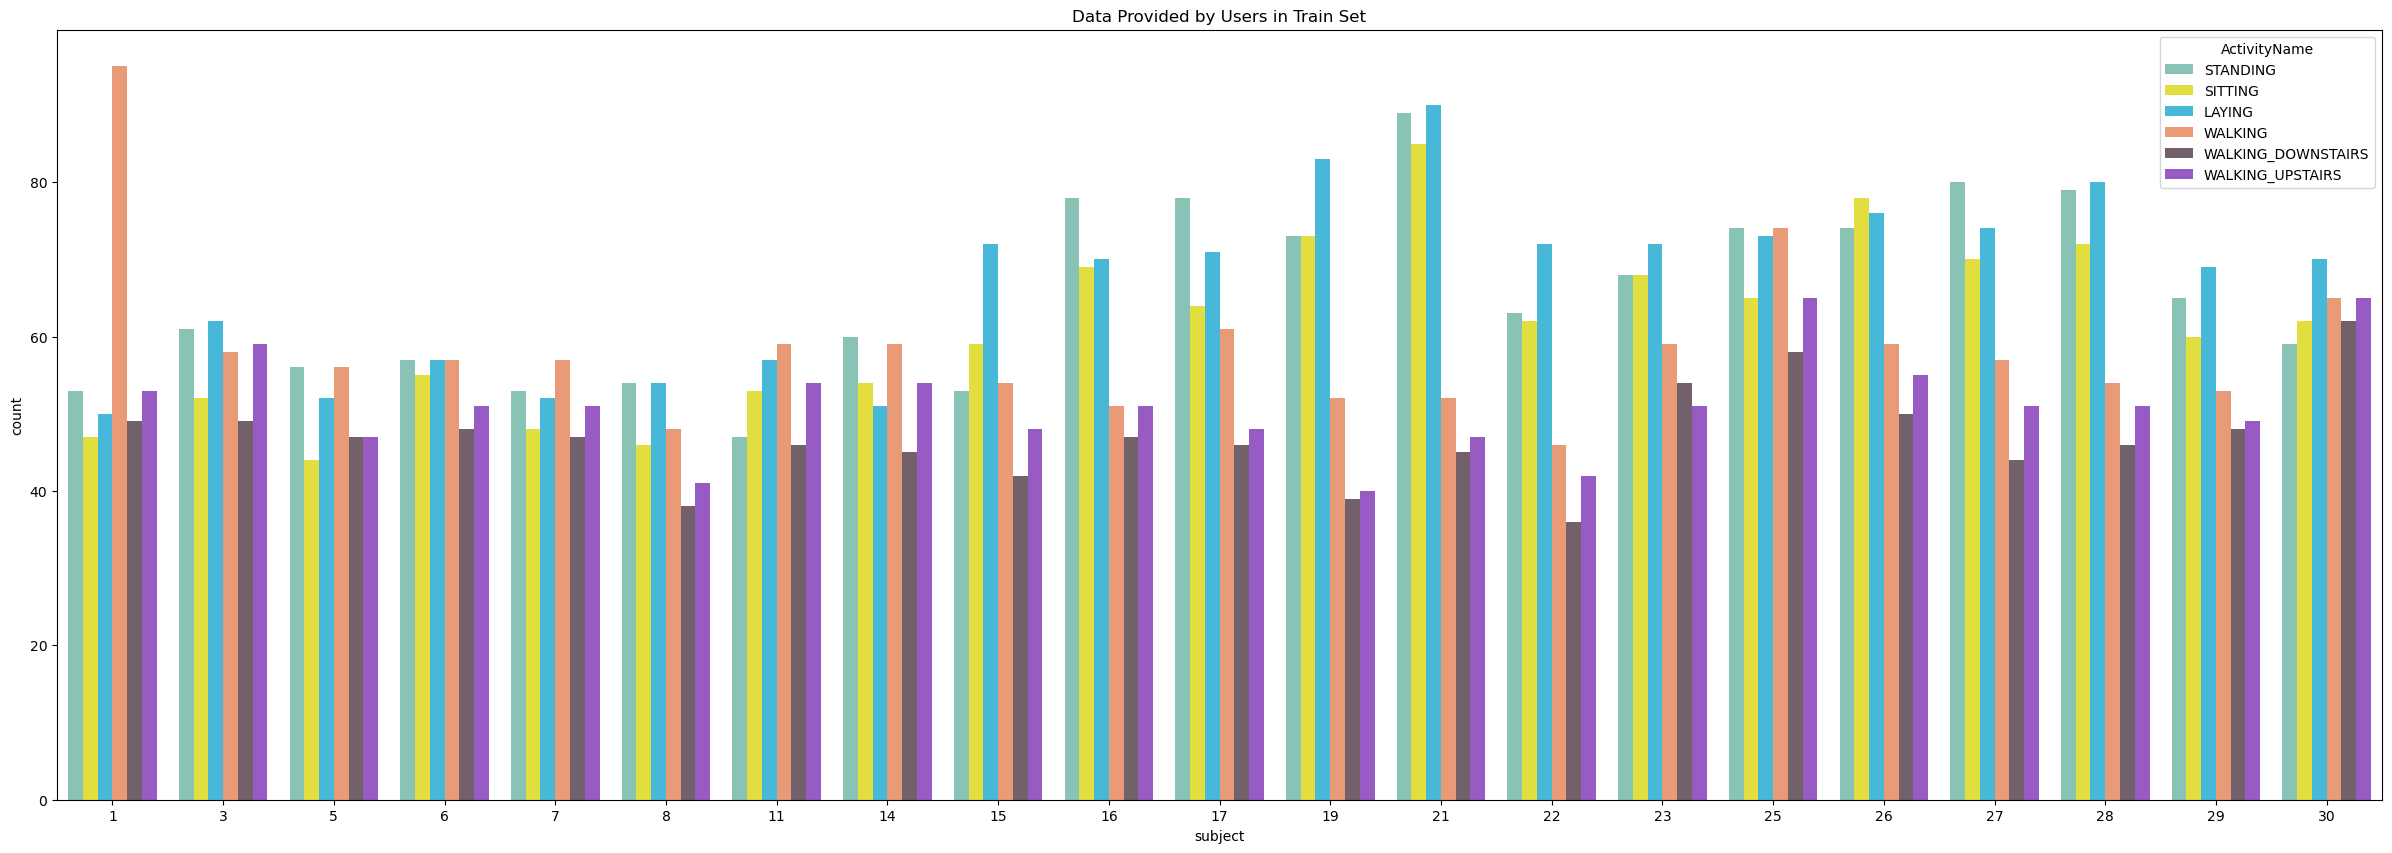

In [9]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = train)
pyplot.title('Data Provided by Users in Train Set')
pyplot.show()

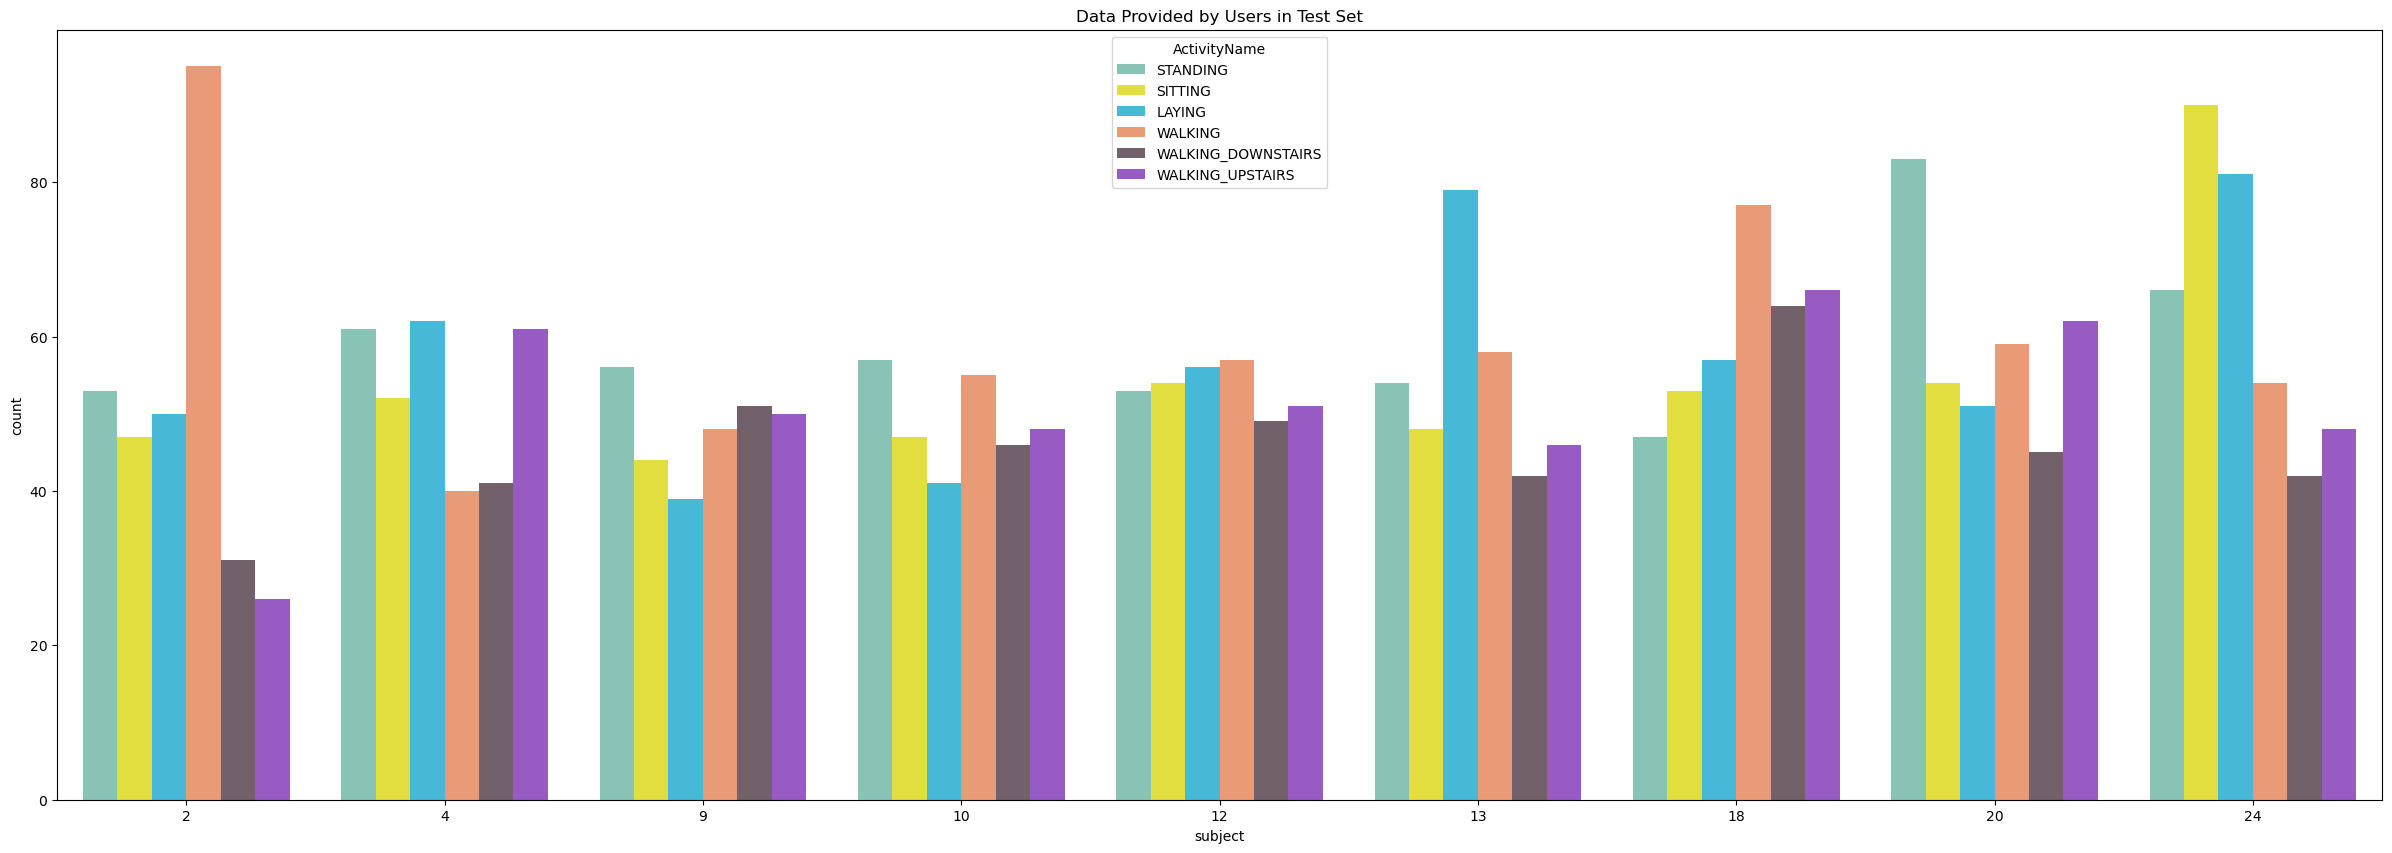

In [10]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = test)
pyplot.title('Data Provided by Users in Test Set')
pyplot.show()

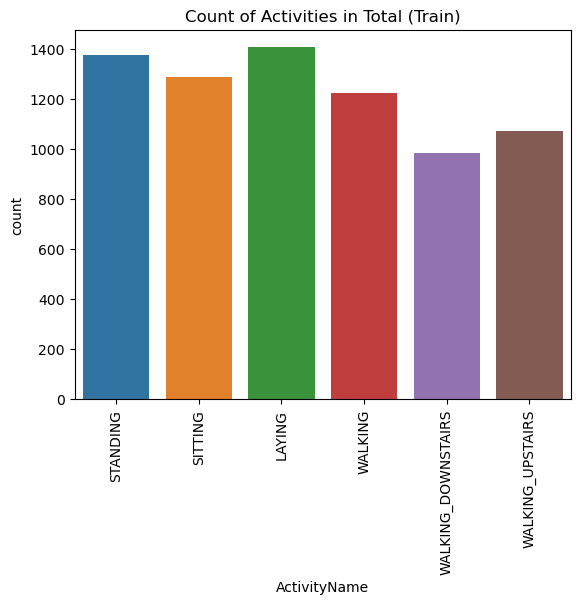

In [11]:
pyplot.title('Count of Activities in Total (Train)')
sns.countplot(x="ActivityName",data=train)
pyplot.xticks(rotation=90)
pyplot.show()

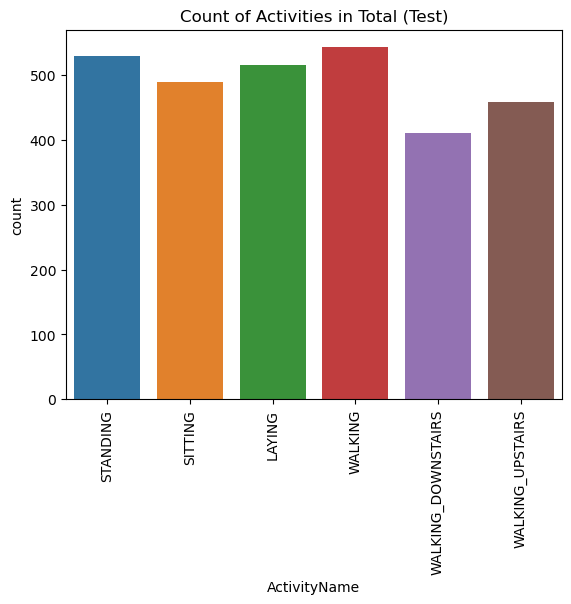

In [12]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",data=test)
pyplot.xticks(rotation=90)
pyplot.show()

In [13]:
#CNN-LSTM Model


In [14]:
def file_load(filepath):
    df = read_csv(filepath, header=None, delim_whitespace=True)
    return df.values    

In [15]:
def train_test_append(filenames, append_before=''):
    datalist = list()
    for name in filenames:
        data = file_load(append_before + name)
        datalist.append(data)
    datalist = dstack(datalist)
    return datalist

In [16]:
def inertial_signals_load(group, append_before=''):
    filepath = append_before + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = train_test_append(filenames, filepath)
    y = file_load(append_before + group + '/y_'+group+'.txt')
    return X, y

In [17]:
def load_dataset(append_before=''):
    trainX, trainy = inertial_signals_load('train', append_before + 'HARDataset/')
    testX, testy = inertial_signals_load('test', append_before + 'HARDataset/')
    trainy = trainy - 1
    testy = testy - 1
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [18]:
trainX, trainy, testX, testy = load_dataset()
verbose, epochs, batch_size = 0, 10, 32
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 4
n_length = 32
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features)) 
print(trainX.shape,testX.shape)

(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
(7352, 4, 32, 9) (2947, 4, 32, 9)


In [21]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history=model.fit(trainX, trainy, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose)
loss , accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#print(model.summary()) 
score=accuracy*100
print('Accuracy = {}'.format(score))

Accuracy = 90.66847562789917


93/93 [==============================] - 1s 9ms/step


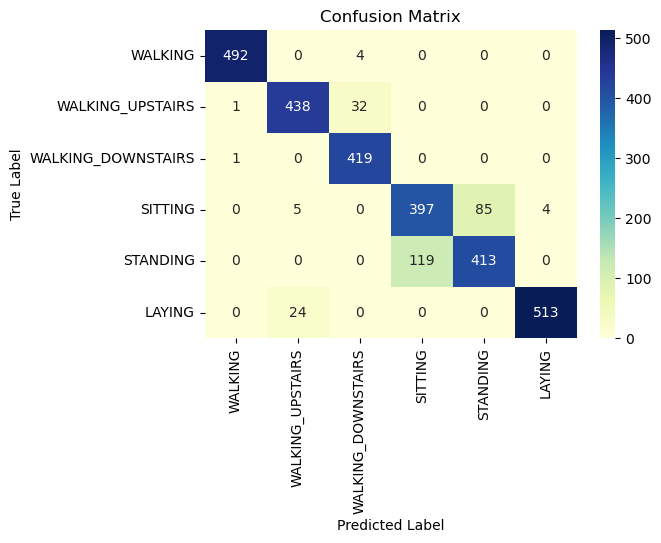

In [23]:
import matplotlib.pyplot as plt
ypred_train = model.predict(trainX)
max_ypred_train = np.argmax(ypred_train, axis=1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
ypred_test = model.predict(testX)
max_ypred_test = np.argmax(ypred_test, axis=1)
max_ytest = np.argmax(testy, axis=1)
matrix = metrics.confusion_matrix(max_ytest, max_ypred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
clr=metrics.classification_report(max_ytest, max_ypred_test)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.94      0.93      0.93       471
           2       0.92      1.00      0.96       420
           3       0.77      0.81      0.79       491
           4       0.83      0.78      0.80       532
           5       0.99      0.96      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947

